In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Fig2a

In [2]:

df2a = pd.read_csv('Fig2a.csv',index_col=0)

In [3]:
control_means = (
    df2a[df2a['Group'] == 'Target']
    .groupby('Phenotype')['Index']
    .mean()
    .sort_values(ascending=True)
)
ordered_phenotypes = control_means.index.tolist()

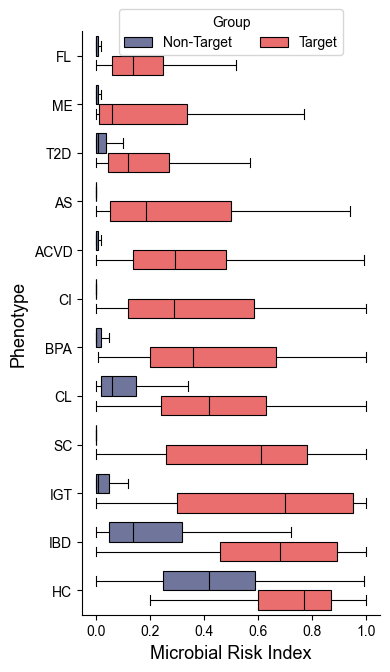

In [4]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42

fig, ax1 = plt.subplots(figsize=(4, len(ordered_phenotypes) * 0.4 + 2)) 

custom_palette = ['#676FA3', '#FF5959']
df2a['Phenotype'] = pd.Categorical(df2a['Phenotype'], categories=ordered_phenotypes, ordered=True)

sns.boxplot(
    x='Index', y='Phenotype', hue='Group', data=df2a,
    showfliers=False, palette=custom_palette, ax=ax1,
    linewidth=0.8, 
    boxprops=dict(edgecolor='black', linewidth=0.8),
    whiskerprops=dict(color='black', linewidth=0.8),
    capprops=dict(color='black', linewidth=0.8),
    medianprops=dict(color='black', linewidth=0.8),
    width=0.8 
)


for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.3))

for side, spine in ax1.spines.items():
    if side not in ['left', 'bottom']:
        spine.set_visible(False)

ax1.legend(title='Group', bbox_to_anchor=(0.5, 1.05), loc='upper center', ncols=2)
ax1.set_xlabel('Microbial Risk Index', fontsize=13)
ax1.set_ylabel('Phenotype', fontsize=13)

plt.tight_layout()
plt.savefig("Fig2a.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()



# Fig2b

In [5]:
df2b = pd.read_csv('Fig2b.csv',index_col=0)
df2b

,HC,ME,IGT,IBD,FL,BPA,AS,SC,T2D,CI,ACVD,CL
HC,1.000000,0.079890,-0.048908,-0.138957,-0.040459,-0.165986,-0.130307,-0.119226,-0.036791,-0.203742,-0.251166,-0.190250
ME,0.079890,1.000000,-0.026096,0.023571,0.015240,-0.043681,-0.035426,-0.022498,-0.054088,-0.042596,-0.040362,-0.038128
IGT,-0.048908,-0.026096,1.000000,-0.019041,0.032876,-0.054384,-0.051263,-0.041562,-0.055057,-0.066696,-0.078396,-0.102910
IBD,-0.138957,0.023571,-0.019041,1.000000,0.100022,-0.072229,-0.069675,-0.098366,-0.088493,-0.107763,-0.138930,-0.138824
FL,-0.040459,0.015240,0.032876,0.100022,1.000000,-0.038454,-0.002091,-0.009127,-0.045202,-0.032537,-0.003788,0.010875
BPA,-0.165986,-0.043681,-0.054384,-0.072229,-0.038454,1.000000,0.129025,0.044542,-0.030597,-0.013542,-0.003963,-0.071983
AS,-0.130307,-0.035426,-0.051263,-0.069675,-0.002091,0.129025,1.000000,0.138176,0.014031,0.054391,0.035241,-0.002929
SC,-0.119226,-0.022498,-0.041562,-0.098366,-0.009127,0.044542,0.138176,1.000000,-0.017804,0.069783,0.012289,-0.043688
T2D,-0.036791,-0.054088,-0.055057,-0.088493,-0.045202,-0.030597,0.014031,-0.017804,1.000000,-0.004734,0.117593,0.027332
CI,-0.203742,-0.042596,-0.066696,-0.107763,-0.032537,-0.013542,0.054391,0.069783,-0.004734,1.000000,0.139114,0.033051


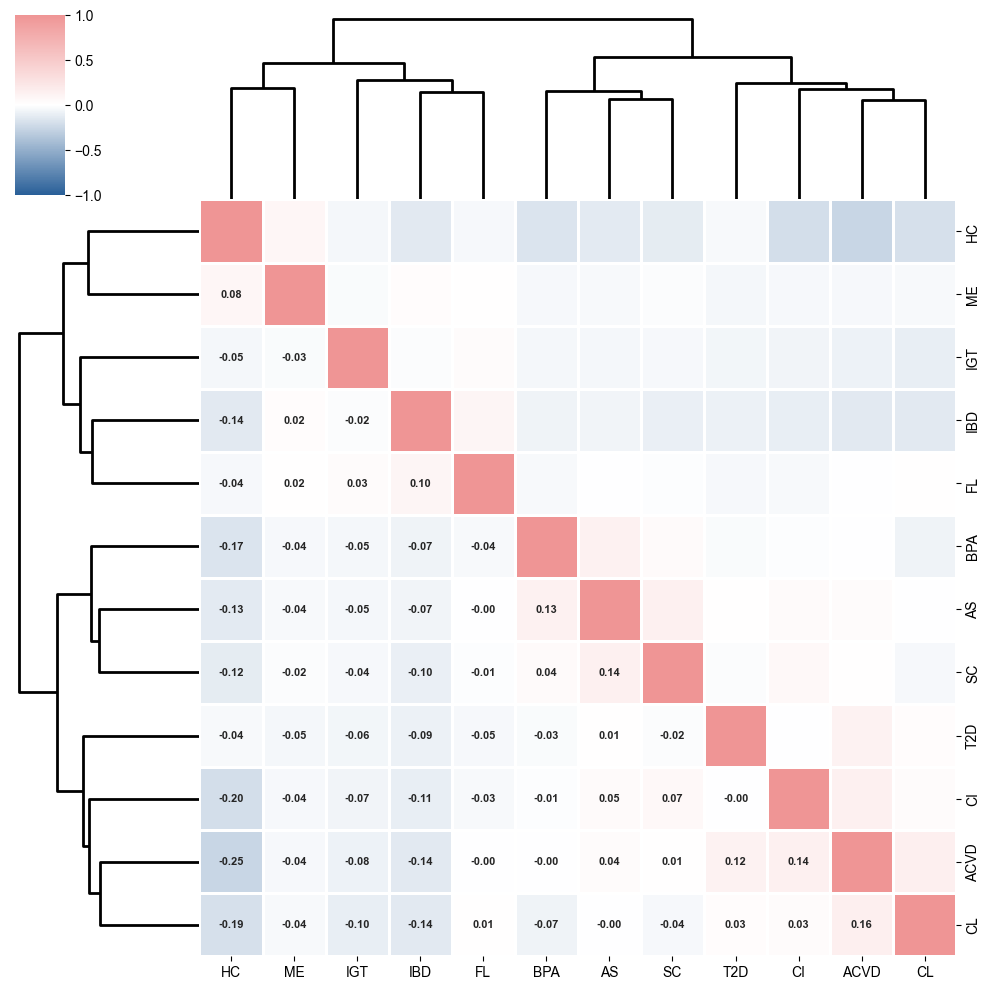

In [6]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42


colors = ['#295F98','white','#EF9595']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)


g = sns.clustermap(df2b, annot=False, cmap=custom_cmap, fmt='.2f',
                   figsize=(10, 10), vmin=-1, vmax=1,
                   linewidths=1,
                   tree_kws={'linewidths': 2, 'color': 'black'},
                   method='ward', metric='euclidean')

row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind
reordered_matrix = df2b.iloc[row_order, col_order]

mask = np.triu(np.ones_like(reordered_matrix, dtype=bool))

sns.heatmap(reordered_matrix, 
            mask=mask, 
            cmap=custom_cmap, 
            vmin=-1, vmax=1,
            annot=True, fmt=".2f",
            annot_kws={"size": 8, "weight": "bold"},
            linewidths=1,
            cbar_ax=g.ax_cbar, 
            ax=g.ax_heatmap,  
            square=True)

plt.show()


# Fig2c-f

In [7]:
df2c = pd.read_csv('./Fig2c.csv',index_col= 0)
df2d = pd.read_csv('./Fig2d.csv',index_col= 0)
df2e = pd.read_csv('./Fig2e.csv',index_col= 0)
df2f = pd.read_csv('./Fig2f.csv',index_col= 0)

In [8]:
def plot_risk_index(plot_df,x,y,order,color1,color2,color3):
    rcParams['font.family'] = 'Arial'
    rcParams['pdf.fonttype'] = 42
    
    fig,ax = plt.subplots(figsize=(4,4))
    ax = sns.boxplot(x=f'{x}', y=f'{y}',
                data=plot_df,
                linewidth=3, 
                showfliers=False,
                order=order,
                width=0.5,
                ax = ax)
    
    p = 0
    n = len(order)
    for box in ax.patches:
        #print(box.__class__.__name__)
        if box.__class__.__name__ == 'PathPatch':
            if p % n == 0:
                box.set_edgecolor(f'{color1}')
                box.set_facecolor((f'{color1}',0.3))
                for k in range(6*p,6*p+5):
                    ax.lines[k].set_color(f'{color1}')
                p += 1
            elif p % n == 1:
                box.set_edgecolor(f'{color2}')
                box.set_facecolor((f'{color2}',0.5))
                for k in range(6*p-1,6*p+4):
                    #print(len(ax.lines))
                    ax.lines[k].set_color(f'{color2}')
                p +=1
            else:
                box.set_edgecolor(f'{color3}')
                box.set_facecolor((f'{color3}',0.5))
                for k in range(6*p-2,6*p+3):
                    #print(len(ax.lines))
                    #print(p)
                    ax.lines[k].set_color(f'{color3}')
                #p +=1
        
    ax.set_xlabel('',fontsize = 17)
    ax.set_ylabel(f'{y}', fontsize=14)

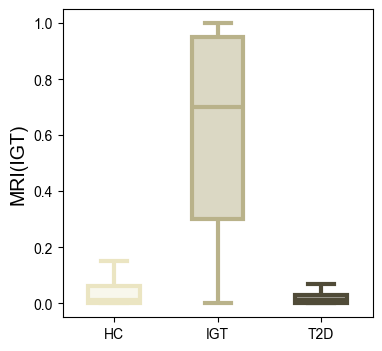

In [9]:
Fig2c = plot_risk_index(df2c,'Phenotype','MRI(IGT)',['HC','IGT','T2D'],'#EBE5C2','#B9B28A','#504B38')


plt.savefig("Fig2c.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')

plt.show()

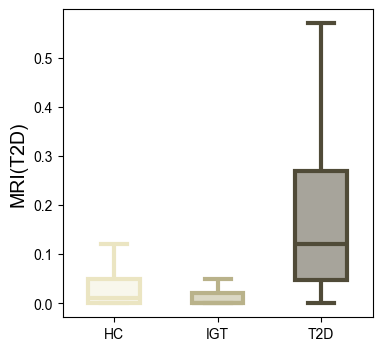

In [10]:
Fig2d = plot_risk_index(df2d,'Phenotype','MRI(T2D)',['HC','IGT','T2D'],'#EBE5C2','#B9B28A','#504B38')

plt.savefig("Fig2d.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')

plt.show()

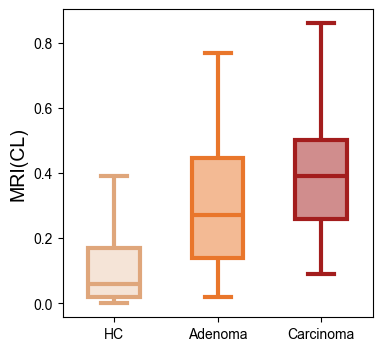

In [11]:
Fig2e = plot_risk_index(df2e,'Subtype','MRI(CL)',['HC','Adenoma','Carcinoma'],'#DFA67B','#E9762B','#A31D1D')
plt.savefig("Fig2e.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()

In [12]:
def plot_risk_index2(plot_df,x,y,order):
    rcParams['font.family'] = 'Arial'
    rcParams['pdf.fonttype'] = 42
    
    fig,ax = plt.subplots(figsize=(4,4))
    ax = sns.boxplot(x=f'{x}', y=f'{y}',
                data=plot_df,
                linewidth=3, 
                showfliers=False,
                order=order,
                width=0.5,
                ax = ax)
    
   
    ax.set_xlabel('',fontsize = 17)
    ax.set_ylabel(f'{y}', fontsize=14)


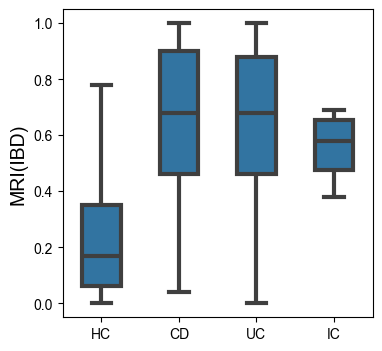

In [13]:
Fig2f = plot_risk_index2(df2f,'disease_subtype','MRI(IBD)',['HC','CD','UC','IC'])
plt.savefig("Fig2f.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()
